In [52]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, kruskal, linregress
import matplotlib.ticker as mticker

csvpath = os.path.join("California_Fire_Incidents.csv")
calfire = pd.read_csv(csvpath)

# Set display options to show all columns
pd.set_option('display.max_columns', None)

columns_to_drop = ['Active', 'Featured', 'Final', 'PercentContained', 'Public', 'SearchKeywords', 'Status']
calfire.drop(columns_to_drop, axis='columns', inplace=True)

# Convert datetime columns with UTC timezone parsing
calfire['Started'] = pd.to_datetime(calfire['Started'], format='ISO8601')
calfire['Updated'] = pd.to_datetime(calfire['Updated'], format='ISO8601')
calfire['Extinguished'] = pd.to_datetime(calfire['Extinguished'], format='ISO8601')

calfire['YearStarted'] = calfire['Started'].dt.year
calfire['MonthStarted'] = calfire['Started'].dt.month
calfire = calfire[calfire.YearStarted != 1969]

# Fill NA values
calfire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'', 
                'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
               'FuelType':'', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
               'SearchDescription':'', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
               'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0}, inplace=True)

# Convert to appropriate integer types
int_columns = ['AcresBurned', 'AirTankers', 'CrewsInvolved', 'Dozers', 'Engines', 
               'Fatalities', 'Injuries', 'Helicopters', 'PersonnelInvolved', 
               'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 
               'StructuresThreatened', 'WaterTenders']

for col in int_columns:
    calfire[col] = calfire[col].astype('int64')

# Return the DataFrame
calfire

,AcresBurned,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PersonnelInvolved,SearchDescription,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,YearStarted,MonthStarted
0,257314,Stanislaus National Forest/Yosemite National Park,0,2013,True,/incidents/2013/8/17/rim-fire/,,,Tuolumne,55,0,0,0,2013-09-06 18:30:00+00:00,0,,0,0,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,0,The Rim Fire was east of Groveland along Highw...,2013-08-17 15:25:00+00:00,0,0,0,0,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06 18:30:00+00:00,0,2013,8
1,30274,USFS Angeles National Forest/Los Angeles Count...,0,2013,True,/incidents/2013/5/30/powerhouse-fire/,,,Los Angeles,19,0,0,0,2013-06-08 18:30:00+00:00,0,,0,0,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,0,The Powerhouse Fire burned in May and June 201...,2013-05-30 15:28:00+00:00,0,0,0,0,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08 18:30:00+00:00,0,2013,5
2,27531,CAL FIRE Riverside Unit / San Bernardino Natio...,0,2013,True,/incidents/2013/7/15/mountain-fire/,,,Riverside,33,0,0,0,2013-07-30 18:00:00+00:00,0,,0,0,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,0,The Mountain Fire burned in July 2013 off High...,2013-07-15 13:43:00+00:00,0,0,0,0,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30 18:00:00+00:00,0,2013,7
3,27440,Tahoe National Forest,0,2013,False,/incidents/2013/8/10/american-fire/,,,Placer,31,0,0,0,2013-08-30 08:00:00+00:00,0,,0,0,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,0,The American Fire burned in August 2013 off De...,2013-08-10 16:30:00+00:00,0,0,0,0,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30 08:00:00+00:00,0,2013,8
4,24251,Ventura County Fire/CAL FIRE,0,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,,Ventura,56,47,8,117,2013-05-11 06:30:00+00:00,0,,11,10,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,2167,"The Springs Fire burned in May 2013, Southboun...",2013-05-02 07:01:00+00:00,6,10,0,0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11 06:30:00+00:00,11,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9,CAL FIRE / Riverside County Fire,0,2019,True,/incidents/2019/10/10/eagle-fire/,,,Riverside,33,0,0,0,2019-10-10 18:11:00+00:00,0,,0,0,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,0,"The Eagle Fire started on October 10, 2019 nea...",2019-10-10 12:08:00+00:00,0,0,0,0,6e93b252-99a3-4214-9921-238373b17535,2019-10-10 18:11:59.733000+00:00,0,2019,10
1632,2,CAL FIRE Nevada-Yuba-Placer Unit,0,2019,True,/incidents/2019/6/28/long-fire/,,,Nevada,29,0,0,0,2019-06-28 17:33:00+00:00,0,,0,0,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,0,"Long Fire started on June 28, 2019 off of Long...",2019-06-28 15:03:04+00:00,0,0,0,0,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30 15:52:01.023000+00:00,0,2019,6
1633,0,Yolo County Fire Protection District,0,2019,False,/incidents/2019/11/25/cashe-fire/,,,Yolo,57,0,0,0,0,0,,0,0,38.734634,"County Road 102 and County Road 17, North of W...",-121.729691,False,Cashe Fire,0,"The Cashe Fire started November 25, 2019 off C...",2019-11-25 12:02:02+00:00,0,0,0,0,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03 16:35:20.930000+00:00,0,2019,11
1634,0,Camp Pendleton Marine Corps Base,0,2019,False,/incidents/2019/10/22/oak-fire/,,,San Diego,37,0,0,0,0,0,,0,0,33.351145,"Near Basilone Road and Las Pulgas Road, near C...",-117.403719,False,Oak Fire,0,"The Oak Fire started October 22, 2019 off near...",2019-

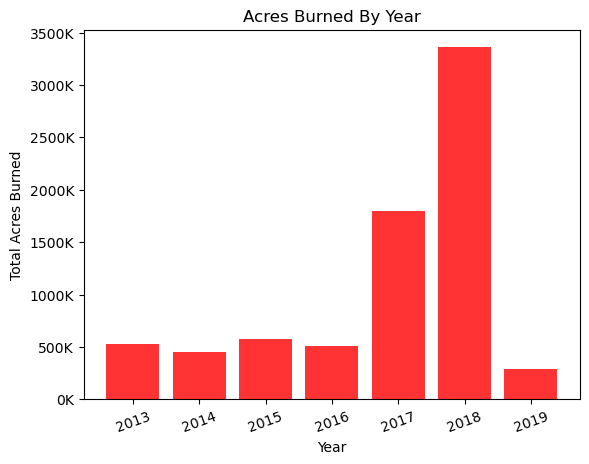

In [53]:
burns_by_year = calfire.groupby('ArchiveYear')['AcresBurned'].sum().reset_index()

plt.bar(burns_by_year["ArchiveYear"],burns_by_year["AcresBurned"], color = 'red', alpha =0.8)
plt.title('Acres Burned By Year')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.xticks(rotation=20)

#use mticker to show the values on the y_axis in "K"
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [54]:
# Only including the fires that involved a firefighter crew.
calfire_filtered = calfire[calfire['CrewsInvolved']>0]

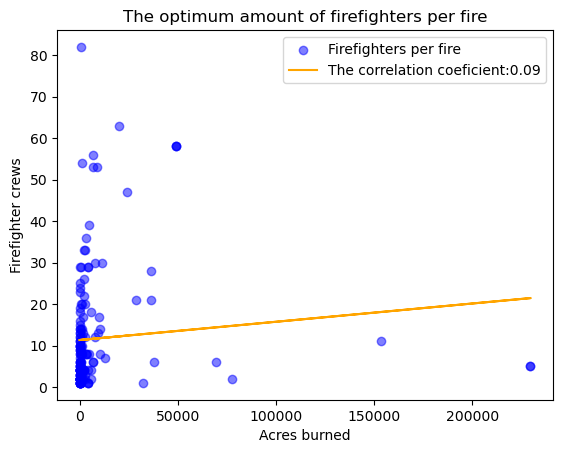

In [55]:
#Calculate the linear regression between acres burneed and the amount of fire fighters
X = calfire_filtered['AcresBurned']
y = calfire_filtered['CrewsInvolved']

#Create a linear regression with Numpy
m ,c =np.polyfit(X,y, 1)

#Plot scatter plot
plt.scatter(X,y, label = "Firefighter crews per fire", color="blue", alpha=0.5)

#Calculate the regression line
plt.plot(X,m * X + c, color = "orange", label= f"Fit: y = {m:.2f}x+{c:.2f}" )

# Calculate the correlation between the amount of fire fighters and the area burned
acres_per_firefighter_correlation = calfire_filtered[["AcresBurned","CrewsInvolved"]].corr().iloc[0,1]

plt.xlabel("Acres burned")
plt.ylabel("Firefighter crews")
plt.title ("The optimum amount of firefighters per fire")
plt.legend([
    "Firefighters per fire",
    f"The correlation coeficient:{acres_per_firefighter_correlation:.2f}"])
plt.show()

In [56]:
# Group data by MonthStarted and count the number of fires
fires_by_month = calfire.groupby('MonthStarted').size()
x = fires_by_month.index
y = fires_by_month.values

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate correlation between MonthStarted and AcresBurned
month_acres_corr, p_value = pearsonr(calfire['MonthStarted'], calfire['AcresBurned'])

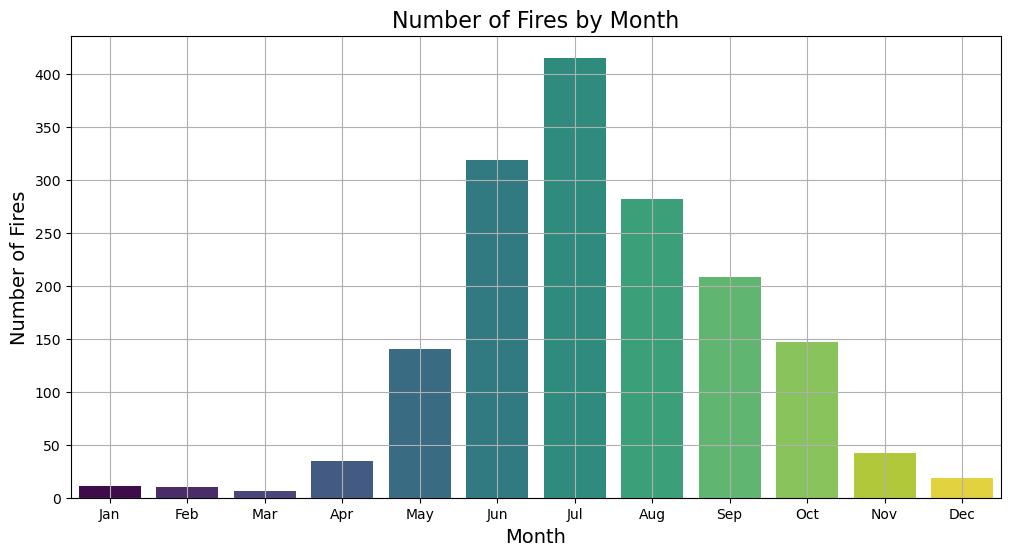

Correlation coefficient (r): 0.0578
P-value: 0.0195
R^2 Value: 0.06034475595439627


In [58]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, hue=fires_by_month.index, palette="viridis", legend=False) 
plt.title("Number of Fires by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()
# Print correlation results
print(f"Correlation coefficient (r): {month_acres_corr:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R^2 Value: {rvalue**2}")

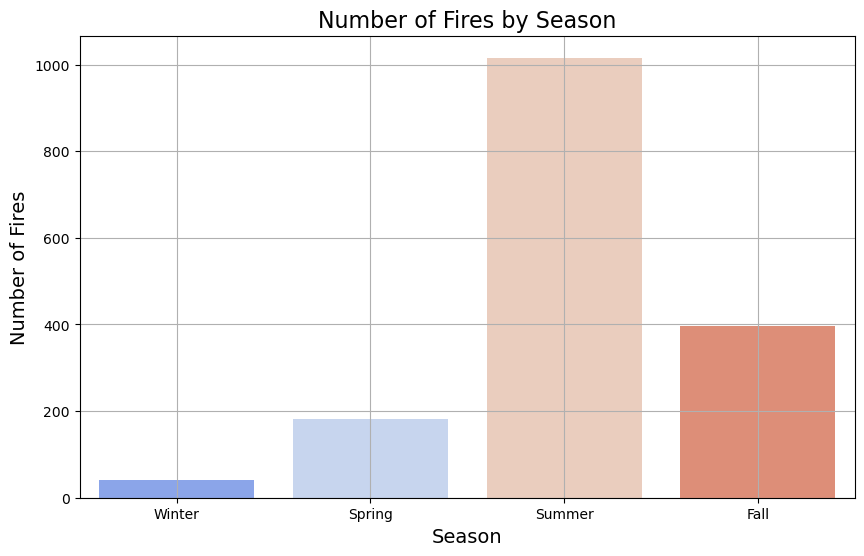

In [59]:

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    else:  # Fall
        return 'Fall'

# Add a 'Season' column to the DataFrame
calfire['Season'] = calfire['MonthStarted'].apply(get_season)

# Group by season and count the number of fires
fires_by_season = calfire.groupby('Season').size()

# Sort seasons for proper order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
fires_by_season = fires_by_season.reindex(season_order)

# Create a bar chart for fires by season
plt.figure(figsize=(10, 6))
sns.barplot(x=fires_by_season.index, y=fires_by_season.values, hue=fires_by_season.index, palette="coolwarm")
plt.title("Number of Fires by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.grid(True)
plt.show()

month_acres_corr, p_value = pearsonr(calfire['MonthStarted'], calfire['AcresBurned'])

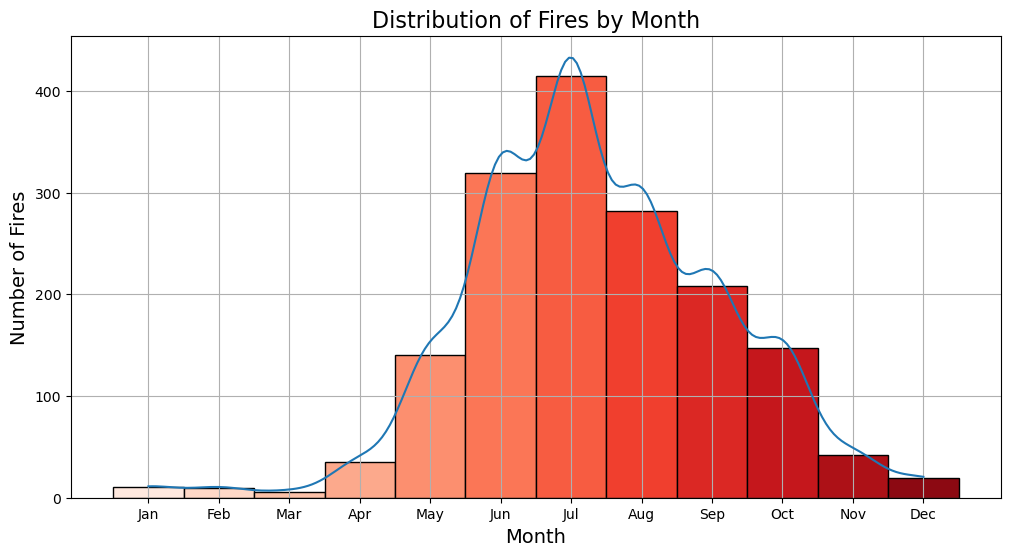

In [60]:
# Define a base color (e.g., blue) and create variations in intensity
base_color = sns.color_palette("Reds", 12)

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.histplot(calfire['MonthStarted'], kde=True, bins=12, discrete=True)

# Assign different intensities of the same hue to each bar
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(base_color[i % len(base_color)])

# Customize the plot
plt.title("Distribution of Fires by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

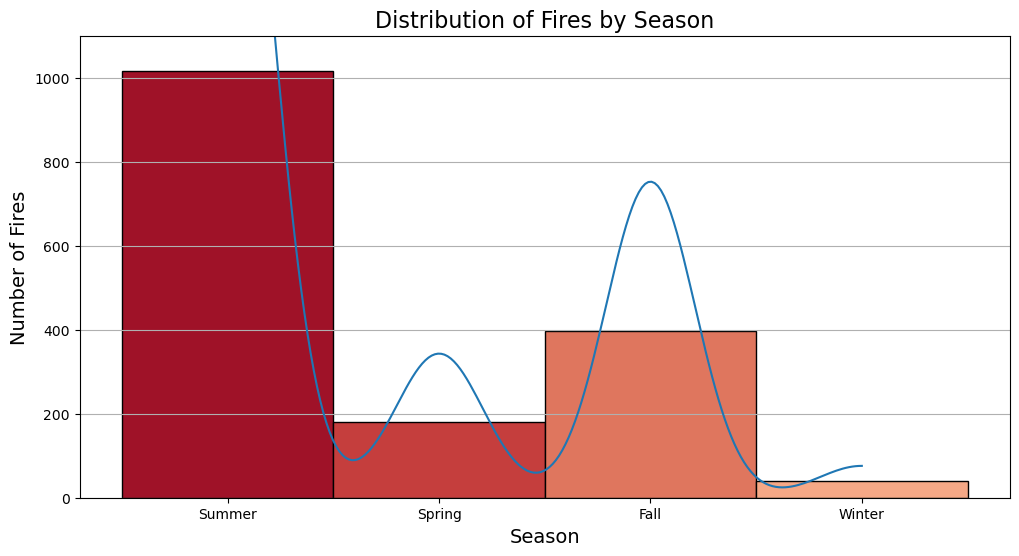

In [61]:

base_color = sns.color_palette("RdBu", 12)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the distribution by season using displot
ax = sns.histplot(data=calfire, x='Season', kde=True, bins=4)

for i, bar in enumerate(ax.patches):
    bar.set_facecolor(base_color[i % len(base_color)])

# Customize the plot
plt.ylim(0, 1100)
plt.title("Distribution of Fires by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.grid(True, axis='y')

# Show the plot
plt.show()  

In [62]:
# Group data by season and count the number of fires
winter = calfire[calfire['Season'] == 'Winter']['MonthStarted']
spring = calfire[calfire['Season'] == 'Spring']['MonthStarted']
summer = calfire[calfire['Season'] == 'Summer']['MonthStarted']
fall = calfire[calfire['Season'] == 'Fall']['MonthStarted']

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(winter, spring, summer, fall)
print(f"Kruskal-Wallis H-statistic: {h_stat:.4f}, P-value: {p_value:.4f}")

Kruskal-Wallis H-statistic: 1134.8564, P-value: 0.0000


In [63]:
# Total number of wildfires
total_fires = len(calfire)
print(f"Total number of wildfires recorded: {total_fires}")

Total number of wildfires recorded: 1634


In [64]:
resource_columns = ["PersonnelInvolved", "AirTankers", "CrewsInvolved", "Engines", "Dozers", "Helicopters", "WaterTenders"]
calfire[resource_columns] = calfire[resource_columns].apply(pd.to_numeric, errors='coerce')

# Count the number of fires per year
fires_per_year = calfire.groupby("ArchiveYear").size()

# Sum of resources used per year
resources_per_year = calfire.groupby("ArchiveYear")[resource_columns].sum()

# Combine both into a single DataFrame
summary_df = resources_per_year.copy()
summary_df["Total Fires"] = fires_per_year

# Reset index for better readability
summary_df = summary_df.reset_index()

# Display the results
print(summary_df)

   ArchiveYear  PersonnelInvolved  AirTankers  CrewsInvolved  Engines  Dozers  \
0         2013              20288          66            703     1459     335   
1         2014               5620           4            244      230      21   
2         2015               6394          20            211      421      88   
3         2016               4293          11            127      262      33   
4         2017               8468           0            221      625      61   
5         2018              13768           0            283     1053     345   
6         2019               8194          13            188      451      50   

   Helicopters  WaterTenders  Total Fires  
0          239           403          162  
1           12            53          117  
2           34           105          152  
3           25            68          185  
4           23            85          437  
5           82           348          315  
6           35            79          266  

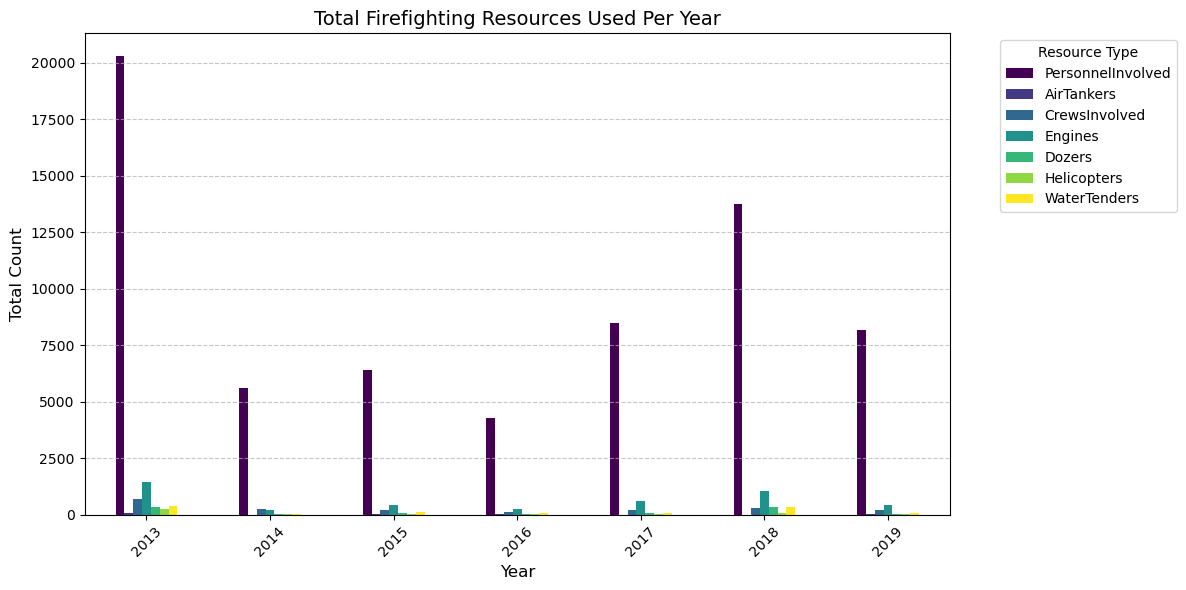

In [65]:
# Plot the grouped bar chart
resources_per_year.plot(kind="bar", figsize=(12, 6), colormap="viridis")

plt.title("Total Firefighting Resources Used Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Resource Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

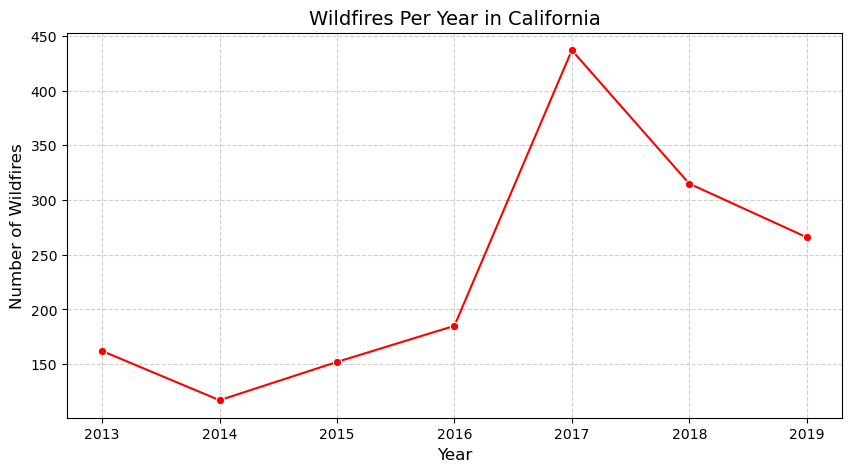

In [66]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=summary_df, x="ArchiveYear", y="Total Fires", marker="o", color="red")

# Customize the chart
plt.title("Wildfires Per Year in California", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Wildfires", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

In [67]:
# Numeber of personnel, air tankers, and other firefighting resources used on average per wildfire.	
# Calculate the average number of resources used per wildfire
average_resources = calfire[resource_columns].mean()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Resource Type": average_resources.index,
    "Average Used per Fire": average_resources.values
})
# Display the DataFrame
print(summary_df)

       Resource Type  Average Used per Fire
0  PersonnelInvolved              41.018972
1         AirTankers               0.069767
2      CrewsInvolved               1.209914
3            Engines               2.754590
4             Dozers               0.570991
5        Helicopters               0.275398
6       WaterTenders               0.698286


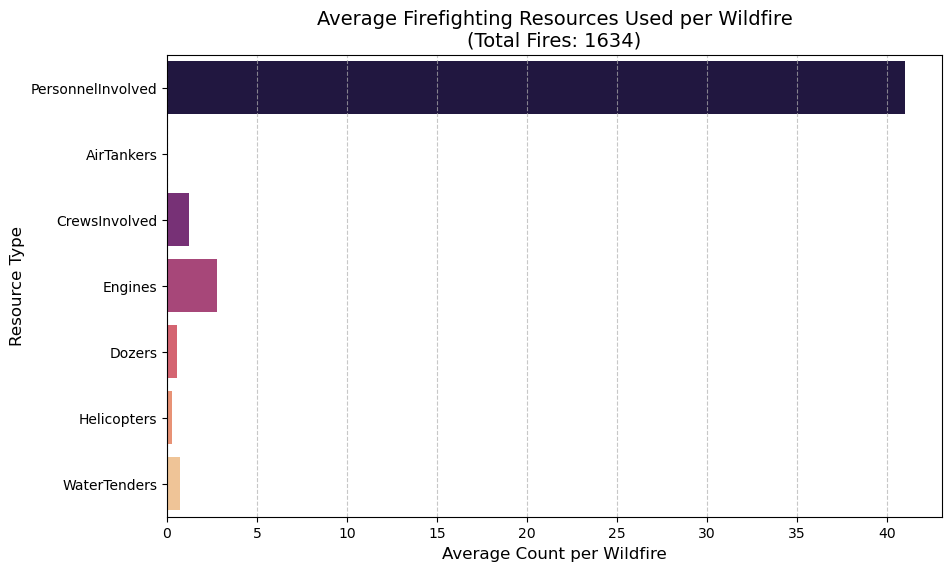

In [68]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=summary_df["Resource Type"], x=summary_df["Average Used per Fire"], palette="magma", hue=summary_df["Resource Type"], legend=False)

plt.title(f"Average Firefighting Resources Used per Wildfire\n(Total Fires: {total_fires})", fontsize=14)
plt.xlabel("Average Count per Wildfire", fontsize=12)
plt.ylabel("Resource Type", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()